In [1]:
# -*- coding: utf-8 -*-
# @Time    : 1/21/2022 3:18 PM
# @Author  : Chen0495
# @Email   : 1346565673@qq.com|chenweiin612@gmail.com
# @File    : PIO.py
# @Software: PyCharm
import numpy as np
import random
import copy
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import PIO
import Function as fun
import math

''' 种群初始化函数 '''


def initial(pop, dim, ub, lb):
    X = np.zeros([pop, dim])
    for i in range(pop):
        for j in range(dim):
            X[i, j] = random.random() * (ub[j] - lb[j]) + lb[j]
            

    return X, lb, ub


''' 种群反向函数 '''


def opposite(X,ub,lb,k=1):
    pop, dim = X.shape
    Y = np.zeros([pop, dim])
    for i in range(pop):
        for j in range(dim):
            Y[i, j] = k * (ub[j] + lb[j]) - X[i, j]
    Y = BorderCheck(Y,ub,lb,pop,dim)
    return Y



'''边界检查函数'''


def BorderCheck(X, ub, lb, pop, dim):
    for i in range(pop):
        for j in range(dim):
            if X[i, j] > ub[j]:
                X[i, j] = ub[j]
            elif X[i, j] < lb[j]:
                X[i, j] = lb[j]
    return X


'''计算适应度函数-1'''


def CaculateFitness(X, fun):
    pop = X.shape[0]
    fitness = np.zeros([pop, 1])
    for i in range(pop):
        fitness[i] = fun(X[i, :])
    return fitness


'''计算适应度函数-2'''


def CaculateFitness2(X,fun,C_c,C_rl):
    pop = X.shape[0]
    fitness = np.zeros([pop, 1])
    for i in range(pop):
        fitness[i] = fun(X[i, :],C_c,C_rl)
    return fitness



'''适应度排序'''


def SortFitness(Fit):
    fitness = np.sort(Fit, axis=0)
    index = np.argsort(Fit, axis=0)
    return fitness, index


'''根据适应度对位置进行排序'''


def SortPosition(X, index):
    Xnew = np.zeros(X.shape)
    for i in range(X.shape[0]):
        Xnew[i, :] = X[index[i], :]
    return Xnew


'''正弦余弦优化函数'''


def SCA(r1,V,G,X):
    r2 = random.uniform(0,2*math.pi)
    r3 = random.uniform(0,2)
    r4 = random.random()
    if r4 < 0.5:
        return V + r1 * np.sin(r2) * np.abs(r3*G - X)
    else:
        return V + r1 * np.cos(r2) * np.abs(r3*G - X)
    


In [2]:
o = [0.2,0.5,0.5,0.3,0.6,
     0.7,0.8,0.9,0.8,0.6,
     0.3,0.5,0.5,0.4,0.2]
c = np.random.uniform(0.5, 1, size=(100,4))
c[:10]

array([[0.92022275, 0.69133546, 0.59446027, 0.9739542 ],
       [0.81930027, 0.91504297, 0.5412356 , 0.54567209],
       [0.99624352, 0.90724978, 0.75488431, 0.56185   ],
       [0.53990129, 0.9324055 , 0.53189964, 0.92468923],
       [0.84616885, 0.54042562, 0.62064419, 0.70231372],
       [0.68917446, 0.56397745, 0.52192997, 0.60477791],
       [0.77313008, 0.61728061, 0.8837587 , 0.87625338],
       [0.60857013, 0.72904238, 0.941691  , 0.99975375],
       [0.58563105, 0.50483421, 0.98909779, 0.76640074],
       [0.95475728, 0.74064082, 0.87728389, 0.99644894]])

In [3]:
rl = []
for it in c:
    f = fun.FPN(o,it)
    rl.append(f)
rl = np.array(rl)
rl[:10]

array([0.85955892, 0.77027315, 0.8484748 , 0.80704617, 0.70897264,
       0.6304933 , 0.79531674, 0.82816958, 0.66812153, 0.92494661])

In [4]:
type(c),type(rl)

(numpy.ndarray, numpy.ndarray)

In [5]:
'''主函数 '''
#设置参数
pop = 50 #种群数量,建议维度dim*5
MaxIter = 1000 #最大迭代次数
dim = 15 #维度
l = -0 #下边界系数
u = 1 #上边界系数
lb = l*np.ones([dim, 1]) #下边界
ub = u*np.ones([dim, 1]) #上边界
#适应度函数选择
fobj = fun.FNs

Nc1= round(MaxIter*0.8) #地图因子
Nc2= MaxIter - Nc1 #指南因子

X, lb, ub = initial(pop, dim, ub, lb)  # 初始化种群
Y = opposite(X,ub,lb,1)# 反向种群
Vec = np.random.random([pop,dim]) #初始速度
X_op = copy.deepcopy(X)
Vec_op = copy.deepcopy(Vec)
X_woa = copy.deepcopy(X)
Vec_woa = copy.deepcopy(Vec)
X,Y

(array([[1.69816709e-01, 4.00410475e-01, 6.81975140e-01, 3.96084107e-01,
         8.31855876e-01, 2.80980484e-01, 2.24161324e-01, 9.43543924e-01,
         8.00581410e-01, 9.98091613e-01, 9.43522735e-01, 8.51651216e-01,
         6.37799594e-03, 4.70407807e-01, 5.81103490e-01],
        [8.67753693e-01, 3.85433104e-01, 8.98710667e-01, 5.32537150e-01,
         6.94347118e-02, 6.04629553e-01, 6.14120207e-02, 7.99233415e-01,
         9.60310988e-01, 6.53300514e-01, 2.30929451e-01, 3.05866770e-01,
         5.78450403e-01, 3.91992008e-01, 7.25204626e-01],
        [7.11894276e-01, 8.31942114e-01, 5.22002044e-01, 4.71902854e-01,
         6.41820524e-01, 5.99583266e-02, 9.72279349e-01, 4.93074656e-01,
         1.59850021e-01, 8.10710786e-01, 1.92893329e-01, 1.21695229e-01,
         6.32558411e-01, 2.86396671e-02, 5.72591950e-01],
        [4.19922537e-01, 4.03213034e-01, 6.63248643e-01, 5.36955954e-01,
         5.26742670e-01, 9.11651788e-01, 4.87961931e-01, 4.97321073e-01,
         7.41487564e-01

In [6]:
X[0, :]

array([0.16981671, 0.40041047, 0.68197514, 0.39608411, 0.83185588,
       0.28098048, 0.22416132, 0.94354392, 0.80058141, 0.99809161,
       0.94352273, 0.85165122, 0.006378  , 0.47040781, 0.58110349])

In [7]:
fun.FNs(X[0, :],c,rl)

27.28531093972969

In [8]:
def WOA(pop, dim, lb, ub, Max_iter, fun, c, rl):
    X, lb, ub = initial(pop, dim, ub, lb)  # 初始化种群
    fitness = CaculateFitness2(X, fun, c, rl)  # 计算适应度值
    fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
    X = SortPosition(X, sortIndex)  # 种群排序
    GbestScore = fitness[0]
    GbestPositon = np.zeros([1,dim])
    GbestPositon[0,:] = X[0, :]
    Curve = np.zeros([MaxIter, 1])
    for t in range(MaxIter):
        Leader = X[0, :]  # 领头鲸鱼
        a = 2 * np.cos(t * math.pi /(2 * MaxIter))
        W = 2 * np.cos(t * math.pi /(2 * MaxIter))
        for i in range(pop):
            r1 = random.random()
            r2 = random.random()

            A = 2 * a * r1 - a
            C = 2 * r2
            b = 1
            l = (a - 1) * random.random() + 1

            for j in range(dim):

                p = random.random()
                if p < 0.5:
                    if np.abs(A) >= 1:
                        rand_leader_index = min(int(np.floor(pop * random.random() + 1)), pop - 1)
                        X_rand = X[rand_leader_index, :]
                        D_X_rand = np.abs(C * X_rand[j] - X[i, j])
                        X[i, j] = W * X_rand[j] - A * D_X_rand
                    elif np.abs(A) < 1:
                        D_Leader = np.abs(C * Leader[j] - X[i, j])
                        X[i, j] = W * Leader[j] - A * D_Leader
                elif p >= 0.5:
                    distance2Leader = np.abs(Leader[j] - X[i, j])
                    X[i, j] = W * distance2Leader * np.exp(b * l) * np.cos(l * 2 * math.pi) + Leader[j]
                

        X = BorderCheck(X, ub, lb, pop, dim)  # 边界检测
        fitness = CaculateFitness2(X, fun, c, rl)  # 计算适应度值
        fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
        X = SortPosition(X, sortIndex)  # 种群排序
        if fitness[0] <= GbestScore:  # 更新全局最优
            GbestScore = fitness[0]
            GbestPositon[0,:] = X[0, :]
        Curve[t] = GbestScore

    return GbestScore, GbestPositon, Curve

# step 1

In [9]:
'''鸽群算法'''
fitness = CaculateFitness2(X, fobj, c, rl)  # 计算适应度值
fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
X = SortPosition(X, sortIndex)  # 种群排序
GbestScore = copy.copy(fitness[0])
GbestPositon = np.zeros([1,dim])
GbestPositon[0,:] =  copy.copy(X[0, :])
Curve = np.zeros([MaxIter, 1])
print(GbestScore,GbestPositon,X[:10],fitness[:10],sep="\n")

[1.85485912]
[[0.62835998 0.15251946 0.81207391 0.34709022 0.89797771 0.80331542
  0.39710612 0.52613007 0.38785753 0.83322651 0.46996692 0.20247325
  0.5238365  0.6954748  0.62515867]]
[[6.28359984e-01 1.52519460e-01 8.12073914e-01 3.47090221e-01
  8.97977714e-01 8.03315421e-01 3.97106122e-01 5.26130073e-01
  3.87857528e-01 8.33226511e-01 4.69966919e-01 2.02473253e-01
  5.23836501e-01 6.95474803e-01 6.25158668e-01]
 [1.74509466e-01 9.94744741e-01 5.62607199e-01 4.24404349e-01
  6.10129364e-01 6.03120450e-01 5.82968372e-01 2.74738493e-01
  8.62094031e-01 8.97661087e-01 5.07399784e-01 5.14752864e-01
  6.25692562e-01 4.78079649e-01 6.86861738e-01]
 [4.19922537e-01 4.03213034e-01 6.63248643e-01 5.36955954e-01
  5.26742670e-01 9.11651788e-01 4.87961931e-01 4.97321073e-01
  7.41487564e-01 8.11256087e-01 8.94328164e-01 3.34657228e-01
  5.07194952e-01 4.89214066e-01 4.08427678e-01]
 [6.29040930e-02 4.08664818e-01 5.21879472e-01 2.91919563e-01
  4.88116928e-01 6.58789884e-01 5.66089131e-01 9.2

In [10]:
'''改进鸽群算法'''
X_op = np.vstack((X_op,Y))

fitness_op = CaculateFitness2(X_op, fobj, c, rl)  # 计算适应度值
fitness_op, sortIndex_op = SortFitness(fitness_op)  # 对适应度值排序
X_op = SortPosition(X_op, sortIndex_op)[:pop]  # 种群排序
fitness_op = fitness_op[:pop]

GbestScore_op = copy.copy(fitness_op[0]) # 最佳适应度
GbestPositon_op = np.zeros([1,dim]) # 最佳位置初始化
GbestPositon_op[0,:] =  copy.copy(X_op[0, :]) # 最佳位置
Curve_op = np.zeros([MaxIter, 1]) # 迭代次数
print(GbestScore_op,GbestPositon_op,X_op[:10],fitness_op[:10],sep="\n")


[1.85485912]
[[0.62835998 0.15251946 0.81207391 0.34709022 0.89797771 0.80331542
  0.39710612 0.52613007 0.38785753 0.83322651 0.46996692 0.20247325
  0.5238365  0.6954748  0.62515867]]
[[0.62835998 0.15251946 0.81207391 0.34709022 0.89797771 0.80331542
  0.39710612 0.52613007 0.38785753 0.83322651 0.46996692 0.20247325
  0.5238365  0.6954748  0.62515867]
 [0.17450947 0.99474474 0.5626072  0.42440435 0.61012936 0.60312045
  0.58296837 0.27473849 0.86209403 0.89766109 0.50739978 0.51475286
  0.62569256 0.47807965 0.68686174]
 [0.78884133 0.41343756 0.91293956 0.65331842 0.18802398 0.41024457
  0.71805544 0.68129636 0.47315046 0.80937368 0.5565051  0.52974283
  0.41150585 0.06736576 0.66958031]
 [0.21689029 0.16332405 0.858951   0.59086339 0.38942582 0.32427275
  0.68260449 0.81410049 0.51827347 0.7444371  0.28770483 0.24933719
  0.49473607 0.62134571 0.89508918]
 [0.41992254 0.40321303 0.66324864 0.53695595 0.52674267 0.91165179
  0.48796193 0.49732107 0.74148756 0.81125609 0.89432816 0

In [11]:
Nc1

800

# step 2 

In [12]:
'''鸽群算法'''
X_new = X
VecNew = Vec
X_new,VecNew

(array([[6.28359984e-01, 1.52519460e-01, 8.12073914e-01, 3.47090221e-01,
         8.97977714e-01, 8.03315421e-01, 3.97106122e-01, 5.26130073e-01,
         3.87857528e-01, 8.33226511e-01, 4.69966919e-01, 2.02473253e-01,
         5.23836501e-01, 6.95474803e-01, 6.25158668e-01],
        [1.74509466e-01, 9.94744741e-01, 5.62607199e-01, 4.24404349e-01,
         6.10129364e-01, 6.03120450e-01, 5.82968372e-01, 2.74738493e-01,
         8.62094031e-01, 8.97661087e-01, 5.07399784e-01, 5.14752864e-01,
         6.25692562e-01, 4.78079649e-01, 6.86861738e-01],
        [4.19922537e-01, 4.03213034e-01, 6.63248643e-01, 5.36955954e-01,
         5.26742670e-01, 9.11651788e-01, 4.87961931e-01, 4.97321073e-01,
         7.41487564e-01, 8.11256087e-01, 8.94328164e-01, 3.34657228e-01,
         5.07194952e-01, 4.89214066e-01, 4.08427678e-01],
        [6.29040930e-02, 4.08664818e-01, 5.21879472e-01, 2.91919563e-01,
         4.88116928e-01, 6.58789884e-01, 5.66089131e-01, 9.22272845e-01,
         3.57975516e-01

In [13]:
'''改进鸽群算法'''
X_new_op = X_op
VecNew_op = Vec_op
X_new_op,VecNew_op

(array([[6.28359984e-01, 1.52519460e-01, 8.12073914e-01, 3.47090221e-01,
         8.97977714e-01, 8.03315421e-01, 3.97106122e-01, 5.26130073e-01,
         3.87857528e-01, 8.33226511e-01, 4.69966919e-01, 2.02473253e-01,
         5.23836501e-01, 6.95474803e-01, 6.25158668e-01],
        [1.74509466e-01, 9.94744741e-01, 5.62607199e-01, 4.24404349e-01,
         6.10129364e-01, 6.03120450e-01, 5.82968372e-01, 2.74738493e-01,
         8.62094031e-01, 8.97661087e-01, 5.07399784e-01, 5.14752864e-01,
         6.25692562e-01, 4.78079649e-01, 6.86861738e-01],
        [7.88841328e-01, 4.13437555e-01, 9.12939564e-01, 6.53318424e-01,
         1.88023981e-01, 4.10244572e-01, 7.18055439e-01, 6.81296363e-01,
         4.73150458e-01, 8.09373682e-01, 5.56505102e-01, 5.29742835e-01,
         4.11505851e-01, 6.73657646e-02, 6.69580311e-01],
        [2.16890291e-01, 1.63324046e-01, 8.58951000e-01, 5.90863392e-01,
         3.89425817e-01, 3.24272749e-01, 6.82604489e-01, 8.14100490e-01,
         5.18273466e-01

# step 3

In [14]:
'''鸽群算法'''
#指南针算子更新
for t in range(Nc1):     
    Vec = VecNew
    print(t)
    for i in range(pop):
        R = 0.5
        #速度更新
        TempV = Vec[i,:] + random.random()*(GbestPositon[0,:] - X[i,:])
        #位置更新
        TempPosition = X[i,:]*(1-np.exp(-R*t)) + TempV
        #边界检查
        for j in range(dim):
            if TempPosition[j]<lb[j] or TempPosition[j]>ub[j]:
                TempPosition[j] = lb[j] + random.random()*(ub[j] - lb[j])
                TempV[j] = random.random()
        X_new[i,:] =  copy.copy(TempPosition)
        VecNew[i,:] =  copy.copy(TempV)

    X =  copy.copy(X_new)
    X = BorderCheck(X, ub, lb, pop, dim)
    fitness = CaculateFitness2(X, fobj, c, rl)  # 计算适应度值
    fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
    X = SortPosition(X, sortIndex)  # 种群排序
    #print("===========No.",t,"============\n",fitness)
    if fitness[0] <= GbestScore:  # 更新全局最优
        GbestScore =  copy.copy(fitness[0])
        GbestPositon[0,:] =  copy.copy(X[0, :])
    Curve[t] = GbestScore
print(max(Curve))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [15]:
'''改进鸽群算法'''
#指南针算子更新
cc = [250,500,1000,1600]
opp = []
for t in range(Nc1): 
    print(t)
    if t in cc:
        opp.append(GbestPositon_op)
    Vec_op = VecNew_op
    for i in range(pop):
        R = 0.5
        #速度更新
        TempV_op = Vec_op[i,:] + random.random()*(GbestPositon_op[0,:] - X_op[i,:])
        
        #位置更新
        TempPosition_op = X_op[i,:]*(1-np.exp(-R*t)) + TempV_op
        #边界检查
        for j in range(dim):
            if TempPosition_op[j]<lb[j] or TempPosition_op[j]>ub[j]:
                TempPosition_op[j] = lb[j] + random.random()*(ub[j] - lb[j])
                TempV_op[j] = random.random()
        X_new_op[i,:] =  copy.copy(TempPosition_op)
        VecNew_op[i,:] =  copy.copy(TempV_op)

    X_op =  copy.copy(X_new_op)
    X_op = BorderCheck(X_op, ub, lb, pop, dim)
    Y_op = opposite(X_op,ub,lb,1)# 反向种群
    X_op = np.vstack((X_op,Y_op))
    fitness_op = CaculateFitness2(X_op, fobj, c, rl)  # 计算适应度值
    fitness_op, sortIndex_op = SortFitness(fitness_op)  # 对适应度值排序
    X_op = SortPosition(X_op, sortIndex_op)[:pop]  # 种群排序
    fitness_op = fitness_op[:pop]
    #print("===========No.",t,"============\n",fitness_op)
    if fitness_op[0] <= GbestScore_op:  # 更新全局最优
        GbestScore_op =  copy.copy(fitness_op[0])
        GbestPositon_op[0,:] =  copy.copy(X_op[0, :])
    #print(GbestScore_op)
    Curve_op[t] = GbestScore_op
print(max(Curve_op))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# step 4

In [16]:
'''鸽群算法'''
# 地标算子更新
for t in range(Nc2):
    print(t)
    # 根据地标舍去后50%，并计算中心
    S = 0
    half = int(np.round(pop/2))
    for i in range(half):
        S = S + X[i,:]*fitness[i]

    Xcenter = S/(half*np.sum(fitness[1:half]))
    for i in range(half):
        for j in range(dim):
            Temp = X[i,j] + random.random()*(Xcenter[j] - X[i,j])
            while Temp<lb[j] or Temp>ub[j]:
                Temp = X[i,j] + random.random()*(Xcenter[j] - X[i,j])
        X[i,:] =  copy.copy(Temp)

    X = BorderCheck(X, ub, lb, pop, dim)
    fitness = CaculateFitness2(X, fobj, c, rl)  # 计算适应度值
    fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
    X = SortPosition(X, sortIndex)  # 种群排序
    # print(fitness)
    if fitness[0] <= GbestScore:  # 更新全局最优
        GbestScore = fitness[0]
        GbestPositon[0,:] = X[0, :]
    Curve[t + Nc1] = GbestScore
print("Curve",max(Curve))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
Curve [0.40304767]


In [17]:
'''改进鸽群算法'''
#地标算子更新
for t in range(Nc2):
    print(t)
    # 根据地标舍去后50%，并计算中心
    S = 0
    r1 = 2-2*t/Nc1
    half = int(np.round(pop/2))
    for i in range(half):
        S = S + X_op[i,:]*fitness_op[i]

    Xcenter = S/(half*np.sum(fitness_op[1:half]))
    for i in range(half):
        for j in range(dim):
            # Temp = X_op[i,j] + random.random()*(Xcenter[j] - X_op[i,j])
            Temp = SCA(r1,X_op[i,j],Xcenter[j], X_op[i,j])
            while Temp<lb[j] or Temp>ub[j]:
                Temp = SCA(r1,X_op[i,j],Xcenter[j], X_op[i,j])
        X_op[i,:] =  copy.copy(Temp)

    X_op = BorderCheck(X_op, ub, lb, pop, dim)
    fitness_op = CaculateFitness2(X_op, fobj, c, rl)  # 计算适应度值
    fitness_op, sortIndex_op = SortFitness(fitness_op)  # 对适应度值排序
    X_op = SortPosition(X_op, sortIndex_op)[:pop]  # 种群排序
    fitness_op = fitness_op[:pop]
    # print(fitness_op)
    if fitness_op[0] <= GbestScore_op:  # 更新全局最优
        GbestScore_op = fitness_op[0]
        GbestPositon_op[0,:] = X_op[0, :]
    Curve_op[t + Nc1] = GbestScore_op
print("Curve_op",max(Curve_op))
# r1 = 2-2*t/Nc1
# TempV_op = SCA(r1,Vec_op[i,:],GbestPositon_op[0,:],X_op[i,:])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
Curve_op [0.47431095]


In [18]:
def WOA(x, pop, dim, lb, ub, Max_iter, fun, c, rl):
    X=x  # 初始化种群
    fitness = CaculateFitness2(X, fun, c, rl)  # 计算适应度值
    fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
    X = SortPosition(X, sortIndex)  # 种群排序
    GbestScore = fitness[0]
    GbestPositon = np.zeros([1,dim])
    GbestPositon[0,:] = X[0, :]
    Curve = np.zeros([MaxIter, 1])
    for t in range(MaxIter):
        Leader = X[0, :]  # 领头鲸鱼
        a = 2 * np.cos(t * math.pi /(2 * MaxIter))
        W = 2 * np.cos(t * math.pi /(2 * MaxIter))
        for i in range(pop):
            r1 = random.random()
            r2 = random.random()

            A = 2 * a * r1 - a
            C = 2 * r2
            b = 1
            l = (a - 1) * random.random() + 1

            for j in range(dim):

                p = random.random()
                if p < 0.5:
                    if np.abs(A) >= 1:
                        rand_leader_index = min(int(np.floor(pop * random.random() + 1)), pop - 1)
                        X_rand = X[rand_leader_index, :]
                        D_X_rand = np.abs(C * X_rand[j] - X[i, j])
                        X[i, j] = W * X_rand[j] - A * D_X_rand
                    elif np.abs(A) < 1:
                        D_Leader = np.abs(C * Leader[j] - X[i, j])
                        X[i, j] = W * Leader[j] - A * D_Leader
                elif p >= 0.5:
                    distance2Leader = np.abs(Leader[j] - X[i, j])
                    X[i, j] = W * distance2Leader * np.exp(b * l) * np.cos(l * 2 * math.pi) + Leader[j]
                

        X = BorderCheck(X, ub, lb, pop, dim)  # 边界检测
        fitness = CaculateFitness2(X, fun, c, rl)  # 计算适应度值
        fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
        X = SortPosition(X, sortIndex)  # 种群排序
        if fitness[0] <= GbestScore:  # 更新全局最优
            GbestScore = fitness[0]
            GbestPositon[0,:] = X[0, :]
        Curve[t] = GbestScore

    return GbestScore, GbestPositon, Curve

In [19]:
GbestScore_woa, GbestPositon_woa, Curve_woa = WOA(X_woa,pop, dim, lb, ub, MaxIter, fobj, c, rl)

# 绘图

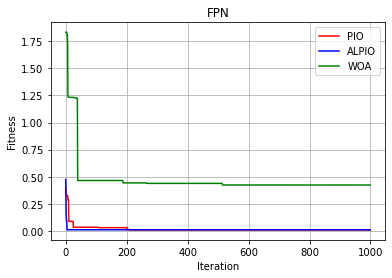

In [20]:
#绘制适应度曲线
plt.figure(1)

plt.plot(Curve,'r-',label='PIO')
plt.plot(Curve_op,'b-',label='ALPIO')
plt.plot(Curve_woa,'g-',label='WOA')
# plt.semilogy(np.abs(Curve),'r-',label='PIO')
# plt.semilogy(np.abs(Curve_op),'b-',label='ALPIO')


plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('FPN',fontsize='large')
plt.legend()
plt.show()

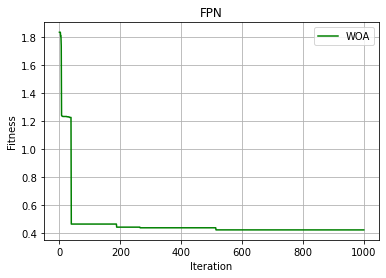

In [21]:
plt.figure(1)
plt.plot(Curve_woa,'g-',label='WOA')
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('FPN',fontsize='large')
plt.legend()
plt.show()

In [22]:
GbestScore,GbestScore_op,GbestScore_woa

(array([0.01283858]), array([0.00506413]))

In [29]:
GbestPositon[0],GbestPositon_op[0],GbestPositon_woa[0]

(array([0.52344832, 0.23867235, 0.68549997, 0.71844199, 0.54580402,
        0.9984452 , 0.95765632, 0.23781682, 0.85084881, 0.49428628,
        0.41989227, 0.28026241, 0.76954685, 0.82576355, 0.25548538]),
 array([0.72559245, 0.03826556, 0.55407083, 0.33243007, 0.35753253,
        0.85594572, 0.94900452, 0.61176478, 0.98727218, 0.60376511,
        0.08375593, 0.28789268, 0.86000266, 0.75213547, 0.93692498]))

In [24]:
opp

[array([[0.72559245, 0.03826556, 0.55407083, 0.33243007, 0.35753253,
         0.85594572, 0.94900452, 0.61176478, 0.98727218, 0.60376511,
         0.08375593, 0.28789268, 0.86000266, 0.75213547, 0.93692498]]),
 array([[0.72559245, 0.03826556, 0.55407083, 0.33243007, 0.35753253,
         0.85594572, 0.94900452, 0.61176478, 0.98727218, 0.60376511,
         0.08375593, 0.28789268, 0.86000266, 0.75213547, 0.93692498]]),
 array([[0.72559245, 0.03826556, 0.55407083, 0.33243007, 0.35753253,
         0.85594572, 0.94900452, 0.61176478, 0.98727218, 0.60376511,
         0.08375593, 0.28789268, 0.86000266, 0.75213547, 0.93692498]])]

In [26]:
o = [0.2,0.5,0.5,0.3,0.6,
     0.7,0.8,0.9,0.8,0.6,
     0.3,0.5,0.5,0.4,0.2]
c = np.random.uniform(0.5, 1, size=(10,4))
c[:10]

array([[0.58099303, 0.76191268, 0.9025209 , 0.82298847],
       [0.7419175 , 0.96276981, 0.50654168, 0.52286249],
       [0.80124717, 0.56025706, 0.74353706, 0.54378867],
       [0.65431457, 0.74848674, 0.64234527, 0.84740537],
       [0.63559063, 0.77251724, 0.80117306, 0.74543616],
       [0.81776201, 0.81754394, 0.58777784, 0.89428387],
       [0.55879961, 0.71602589, 0.52649656, 0.5152025 ],
       [0.71280178, 0.86899052, 0.66928909, 0.93570494],
       [0.76608414, 0.85526507, 0.75815726, 0.64158815],
       [0.98638631, 0.9512574 , 0.76280023, 0.92550316]])

In [28]:
rl = []
for it in c:
    f = fun.FPN(o,it)
    rl.append(f)
rl = np.array(rl)
rl[:10]

array([0.7668284 , 0.75966285, 0.69969386, 0.69851065, 0.80971422,
       0.91305757, 0.88923737, 0.87293187, 0.70233145, 0.7541033 ])

In [30]:
rl = []
for it in c:
    f = fun.FPN(GbestPositon[0],it)
    rl.append(f)
rl = np.array(rl)
rl[:10]

array([0.75458571, 0.74979996, 0.70361292, 0.69889619, 0.81217078,
       0.90894826, 0.88966116, 0.85818467, 0.70297883, 0.75967409])

In [31]:
rl = []
for it in c:
    f = fun.FPN(GbestPositon_op[0],it)
    rl.append(f)
rl = np.array(rl)
rl[:10]

array([0.75733878, 0.75026995, 0.70844101, 0.69708849, 0.81465991,
       0.91276826, 0.89009796, 0.86825472, 0.70105327, 0.75470232])

# ALL

In [1]:
import numpy as np
import random
import math
import Function as funs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

'''优化函数'''


# # y = x^2, 用户可以自己定义其他函数
# def fun(X): # F2
#     Y = X[1:]
#     X = X[:-1]
#     O = np.sum(100 * (Y - X*X)**2 + (1-X)**2)
#     return O


''' 种群初始化函数 '''


def initial(pop, dim, ub, lb):
    X = np.zeros([pop, dim])
    for i in range(pop):
        for j in range(dim):
            X[i, j] = random.random() * (ub[j] - lb[j]) + lb[j]

    return X, lb, ub


'''边界检查函数'''


def BorderCheck(X, ub, lb, pop, dim):
    for i in range(pop):
        for j in range(dim):
            if X[i, j] > ub[j]:
                X[i, j] = ub[j]
            elif X[i, j] < lb[j]:
                X[i, j] = lb[j]
    return X


'''计算适应度函数'''


def CaculateFitness(X, fun):
    pop = X.shape[0]
    fitness = np.zeros([pop, 1])
    for i in range(pop):
        fitness[i] = fun(X[i, :])
    return fitness


'''计算适应度函数-2'''


def CaculateFitness2(X,fun,C_c,C_rl):
    pop = X.shape[0]
    fitness = np.zeros([pop, 1])
    for i in range(pop):
        fitness[i] = fun(X[i, :],C_c,C_rl)
    return fitness


'''适应度排序'''


def SortFitness(Fit):
    fitness = np.sort(Fit, axis=0)
    index = np.argsort(Fit, axis=0)
    return fitness, index


'''根据适应度对位置进行排序'''


def SortPosition(X, index):
    Xnew = np.zeros(X.shape)
    for i in range(X.shape[0]):
        Xnew[i, :] = X[index[i], :]
    return Xnew



In [2]:
'''鲸鱼优化算法'''


def WOA(pop, dim, lb, ub, Max_iter, fun, c, rl):
    X, lb, ub = initial(pop, dim, ub, lb)  # 初始化种群
    fitness = CaculateFitness2(X, fun, c, rl)  # 计算适应度值
    fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
    X = SortPosition(X, sortIndex)  # 种群排序
    GbestScore = fitness[0]
    GbestPositon = np.zeros([1,dim])
    GbestPositon[0,:] = X[0, :]
    Curve = np.zeros([MaxIter, 1])
    for t in range(MaxIter):
        Leader = X[0, :]  # 领头鲸鱼
        a = 2 * np.cos(t * math.pi /(2 * MaxIter))
        W = 2 * np.cos(t * math.pi /(2 * MaxIter))
        for i in range(pop):
            r1 = random.random()
            r2 = random.random()

            A = 2 * a * r1 - a
            C = 2 * r2
            b = 1
            l = (a - 1) * random.random() + 1

            for j in range(dim):

                p = random.random()
                if p < 0.5:
                    if np.abs(A) >= 1:
                        rand_leader_index = min(int(np.floor(pop * random.random() + 1)), pop - 1)
                        X_rand = X[rand_leader_index, :]
                        D_X_rand = np.abs(C * X_rand[j] - X[i, j])
                        X[i, j] = W * X_rand[j] - A * D_X_rand
                    elif np.abs(A) < 1:
                        D_Leader = np.abs(C * Leader[j] - X[i, j])
                        X[i, j] = W * Leader[j] - A * D_Leader
                elif p >= 0.5:
                    distance2Leader = np.abs(Leader[j] - X[i, j])
                    X[i, j] = W * distance2Leader * np.exp(b * l) * np.cos(l * 2 * math.pi) + Leader[j]
                

        X = BorderCheck(X, ub, lb, pop, dim)  # 边界检测
        fitness = CaculateFitness2(X, fun, c, rl)  # 计算适应度值
        fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
        X = SortPosition(X, sortIndex)  # 种群排序
        if fitness[0] <= GbestScore:  # 更新全局最优
            GbestScore = fitness[0]
            GbestPositon[0,:] = X[0, :]
        Curve[t] = GbestScore

    return GbestScore, GbestPositon, Curve

In [3]:
'''主函数 '''
# 设置参数
pop = 50  # 种群数量
MaxIter = 1000  # 最大迭代次数
dim = 15  # 维度
lb = -0 * np.ones([dim, 1])  # 下边界
ub = 1 * np.ones([dim, 1])  # 上边界

o = [0.2,0.3,0.5,0.3,0.6, # 最佳参数期望
     0.7,0.5,0.9,0.7,0.6,
     0.3,0.5,0.7,0.4,0.2]
c = np.random.uniform(0.5, 1, size=(100,4)) # 随机输入值

rl = []
for it in c:
    f = funs.FPN(o,it)
    rl.append(f)
rl = np.array(rl) # 输出值

fun = funs.FNs

In [4]:
GbestScore, GbestPositon, Curve = WOA(pop, dim, lb, ub, MaxIter, fun ,c,rl)
print('最优适应度值：', GbestScore)
print('最优解：', GbestPositon)

最优适应度值： [0.20881649]
最优解： [[0.63893192 0.42219942 0.2355196  0.28024813 0.5078612  0.63915287
  0.97507913 0.2453193  0.8079872  0.72892209 0.19660862 0.51169278
  0.8035844  0.49510379 0.21478633]]


Text(0.5, 1.0, 'WOA')

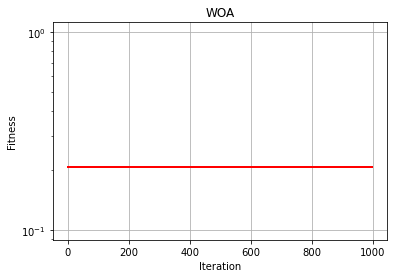

In [5]:
# 绘制适应度曲线
plt.figure(1)
plt.semilogy(Curve, 'r-', linewidth=2)
plt.xlabel('Iteration', fontsize='medium')
plt.ylabel("Fitness", fontsize='medium')
plt.grid()
plt.title('WOA', fontsize='large')


In [ ]:
# 绘制搜索空间
fig = plt.figure(2)
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X ** 2 + Y ** 2
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()